# Import data

In [76]:
library(dplyr)
library("ggpubr")
samples<-read.csv("./named/iperf_all/iperf_c3Client_c4Server_dedicatedhost.csv")


## Network Test Description 
In that experiment, iperf act in the following way: Client establish a TCP connection to server, then server simultaneously connect back<br>

- BandwidthUpload is measuring client -> server connection
- BandwitdhDownload is mearsuring server -> client connection 
- Each client reside in an independent VM which are co-located on a dedicated c3 host
- Servers are the same except type of host is c4  #increased account limits after that

In [77]:
samples["bandwitdhDownload"] = as.numeric(gsub(" Mbits/sec","",unlist(samples["bandwitdhDownload"])))
samples["bandwidthUpload"] = as.numeric(gsub(" Mbits/sec","",unlist(samples["bandwidthUpload"])))
samples

instanceID,instanceType,experimentID,interval,bandwidthUpload,bandwitdhDownload,setId,vmId,cmd
i-0664c37250648f140,c3.large,1540010941,15.0 sec,548,547,5,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15
i-0664c37250648f140,c3.large,1540010941,15.0 sec,472,472,5,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15
i-0664c37250648f140,c3.large,1540010941,15.0 sec,474,471,5,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15
i-0664c37250648f140,c3.large,1540010941,15.0 sec,548,547,6,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15
i-0664c37250648f140,c3.large,1540010941,15.0 sec,473,472,6,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15
i-0664c37250648f140,c3.large,1540010941,15.0 sec,473,472,6,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15
i-0664c37250648f140,c3.large,1540010941,15.0 sec,548,547,7,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15
i-0664c37250648f140,c3.large,1540010941,15.0 sec,471,474,7,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15
i-0664c37250648f140,c3.large,1540010941,15.0 sec,473,472,7,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15
i-0664c37250648f140,c3.large,1540010941,15.0 sec,550,472,8,5,iperf -c 54.197.219.156 --dualtest --window 416k --time 15


# On column 'bandwidthDownload'

In [63]:
statistic_result=data.frame()

for(i in 1:16){
    thisSet=samples[samples$set==i,'bandwitdhDownload']
    statistic_result=rbind(statistic_result,c(range(thisSet),mean(thisSet),median(thisSet),var(thisSet),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
472,549,497.6667,472.0,1976.3333,1
472,548,497.6667,473.5,1490.6667,2
470,547,496.7778,472.0,1382.4444,3
471,549,497.5833,473.0,1359.9015,4
468,547,496.4667,472.0,1291.4095,5
471,548,497.1111,472.5,1336.3399,6
450,548,494.8095,473.0,1213.1619,7
440,547,487.1250,475.5,623.9402,8
369,549,479.6667,474.0,2242.6154,9
383,504,450.6333,448.0,1090.6540,10


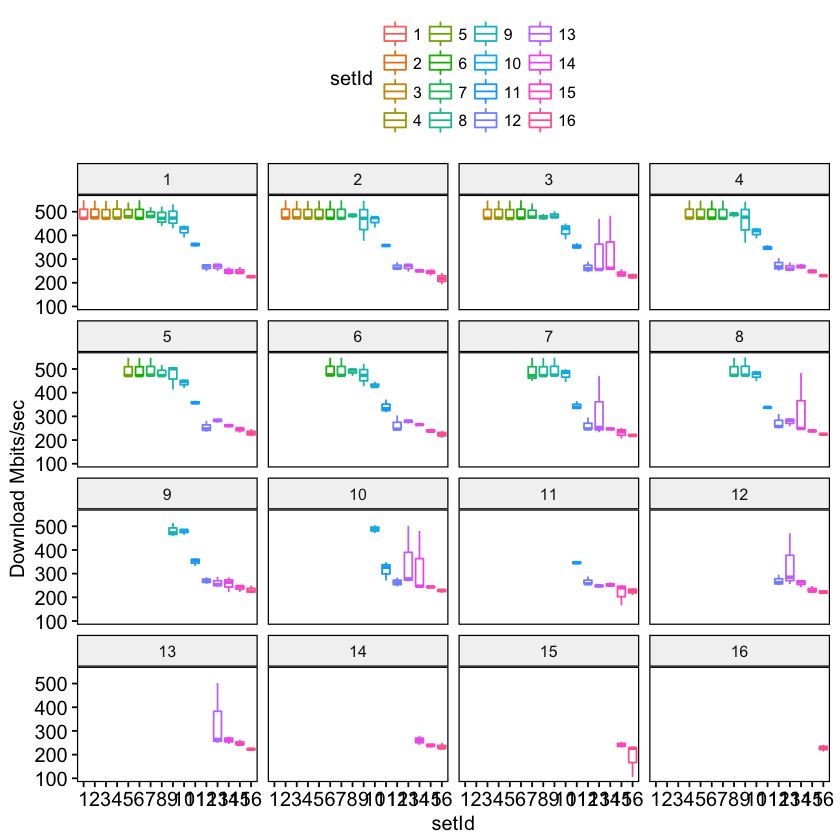

In [64]:
ggboxplot(samples, x = "setId", y = "bandwitdhDownload", 
          color = "setId", 
          ylab = "Download Mbits/sec", xlab = "setId",facet.by='vmId')

# On column 'bandwidthUpload'

In [66]:
statistic_result=data.frame()

for(i in 1:16){
    thisSet=samples[samples$set==i,'bandwidthUpload']
    statistic_result=rbind(statistic_result,c(range(thisSet),mean(thisSet),median(thisSet),var(thisSet),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
473,547,498.3333,475.0,1777.33333,1
471,547,497.0000,472.5,1500.40000,2
472,548,498.2222,474.0,1357.44444,3
472,548,497.2500,472.5,1363.84091,4
470,548,498.0000,474.0,1322.85714,5
471,550,497.7778,473.0,1327.24183,6
471,550,497.8095,473.0,1316.06190,7
472,550,498.4167,474.0,1316.42754,8
470,551,498.2593,473.0,1355.81481,9
472,551,499.2333,475.0,1308.18506,10


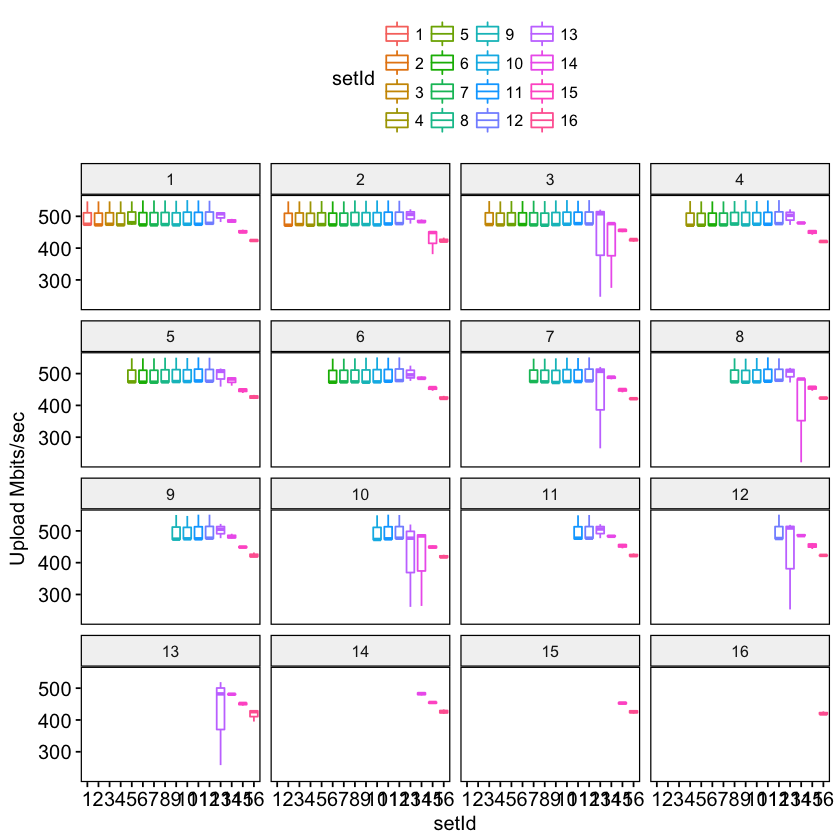

In [67]:
ggboxplot(samples, x = "setId", y = "bandwidthUpload", 
          color = "setId", 
          ylab = "Upload Mbits/sec", xlab = "setId",facet.by='vmId')

# Try to figure out the pattern on  'bandwidthUpload + bandwidthDownload'

In [68]:
samples["cmd"] = samples["bandwidthUpload"] + samples["bandwitdhDownload"] 


In [69]:
statistic_result=data.frame()

for(i in 1:16){
    thisSet=samples[samples$set==i,'cmd']
    statistic_result=rbind(statistic_result,c(range(thisSet),mean(thisSet),median(thisSet),var(thisSet),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
945,1096,996.0000,947.0,7501.0000,1
944,1095,994.6667,945.5,5980.6667,2
945,1095,995.0000,946.0,5476.5000,3
943,1096,994.8333,945.0,5446.5152,4
940,1095,994.4667,945.0,5222.6952,5
943,1098,994.8889,945.0,5324.8105,6
925,1095,992.6190,946.0,4973.6476,7
945,1095,985.5417,961.5,2437.8243,8
920,1096,977.9259,972.0,1996.2251,9
895,1038,949.8667,946.0,1534.8782,10


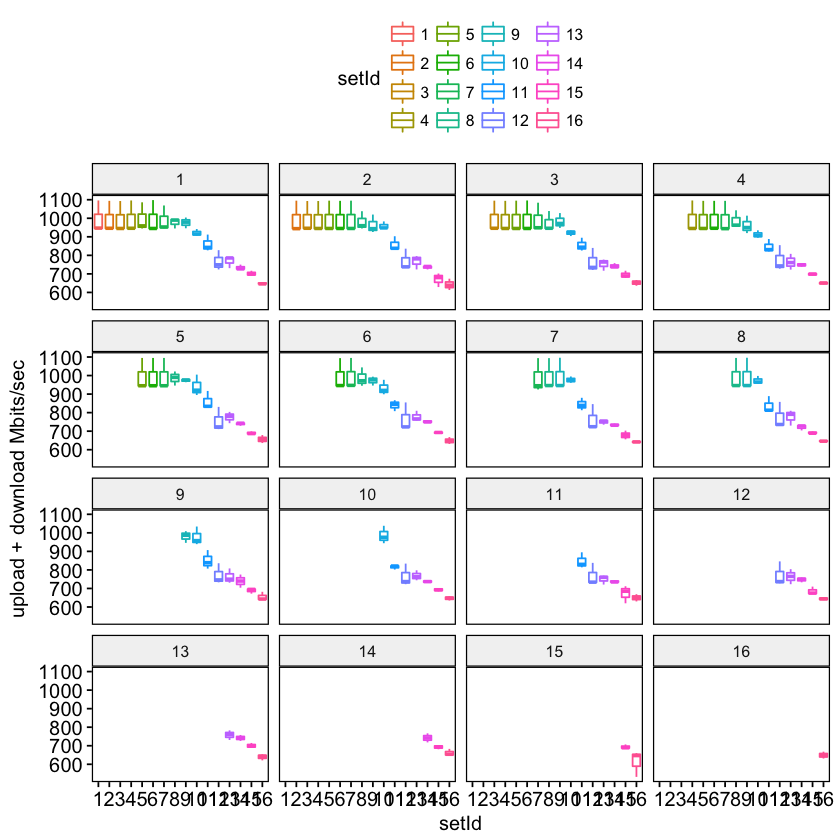

In [70]:
ggboxplot(samples, x = "setId", y = "cmd", 
          color = "setId", 
          ylab = "upload + download Mbits/sec", xlab = "setId",facet.by='vmId')

# Conclusion

TODO:<br>
upload + download = fairly fixed throughput -> from view of a single dedicated host<br>
performance begin to drop from set8 and it's monotonically decreasing<br>


In [71]:
set8.mean = 985.5417
set16.mean = 646.5833
(set8.mean - set16.mean) / set8.mean

[1] 0.3439311

In [72]:
set8.mean * 8
set16.mean * 16

[1] 7884.334

[1] 10345.33